In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

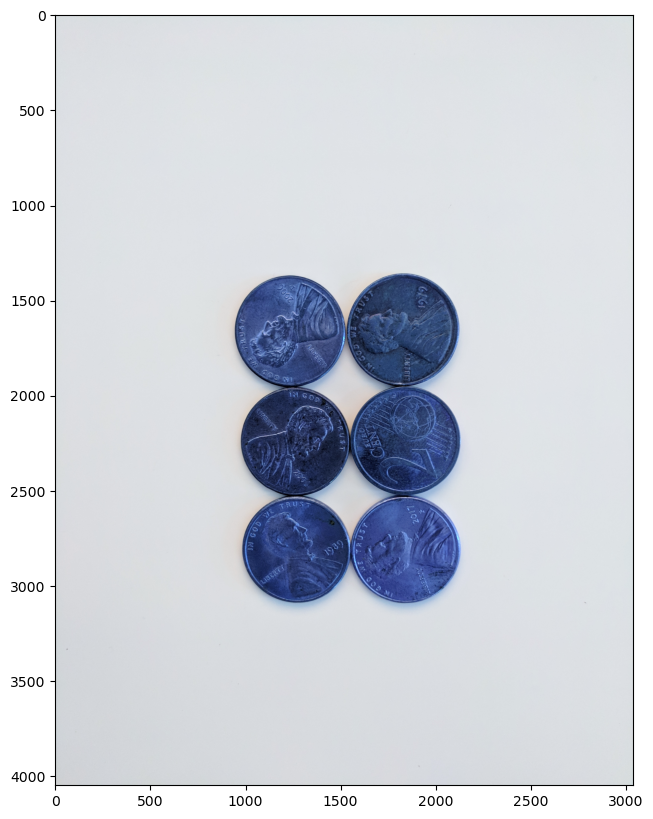

In [35]:
img = cv2.imread('../DATA/pennies.jpg')
display(img)

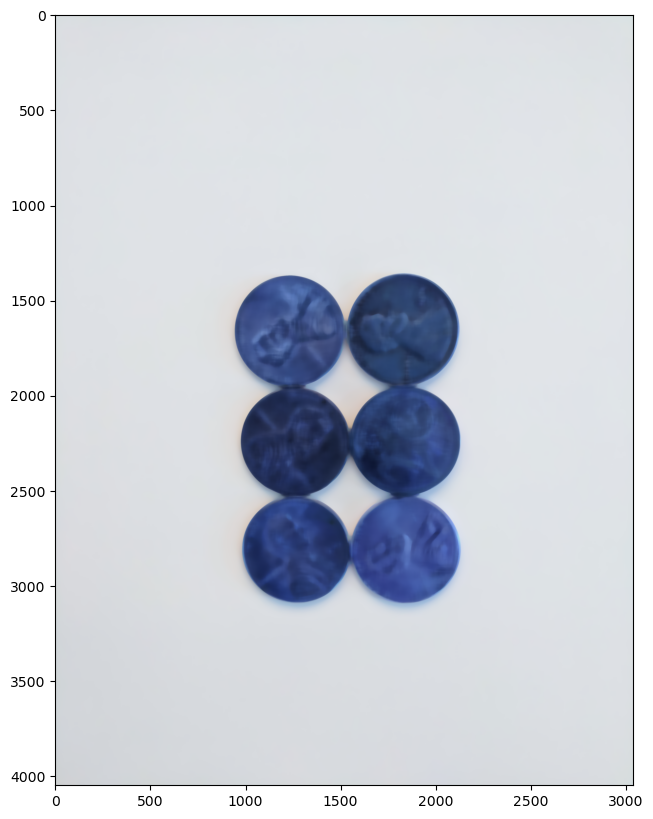

In [36]:
#Step 1 blur
img = cv2.medianBlur(img, 35)
display(img)


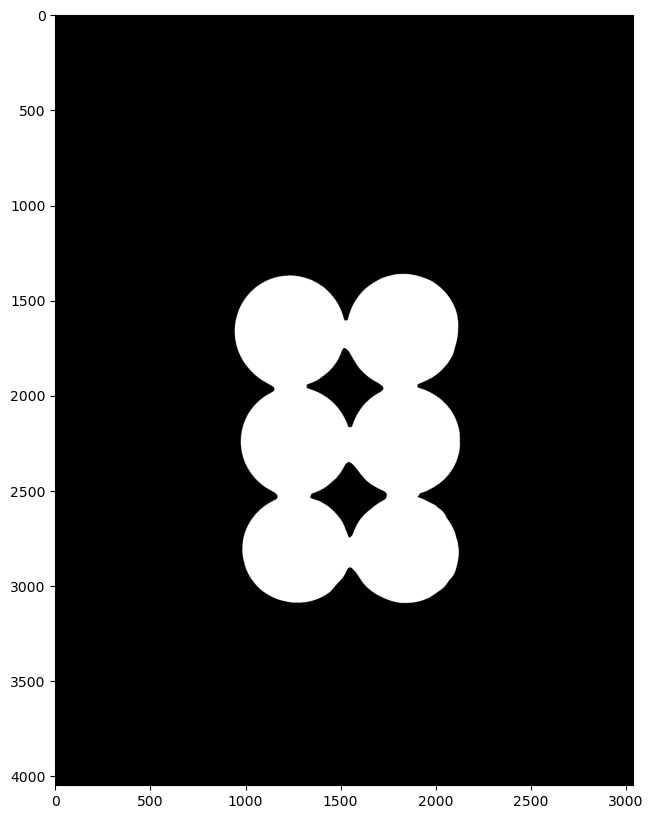

In [37]:
#Step 2 convert to gray and threshold (OTSU Methond)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display(thresh)

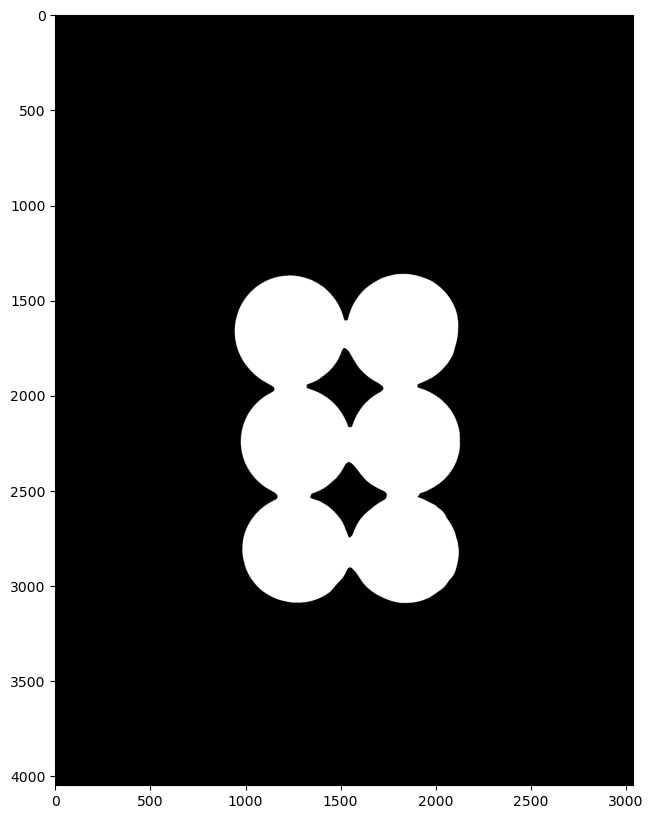

In [38]:
#Step 3 noise removal(optional)
kernel = np.ones((3,3), np.uint8)
sure_bg = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations =2)
display(sure_bg)

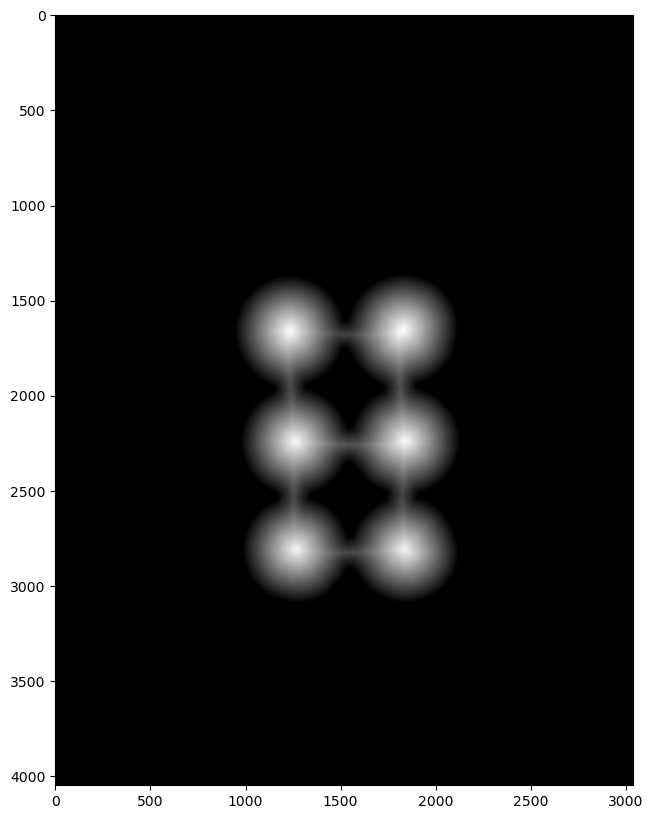

In [39]:
#Distance transformation
dist_transform = cv2.distanceTransform(sure_bg, cv2.DIST_L2, 5)
display(dist_transform)

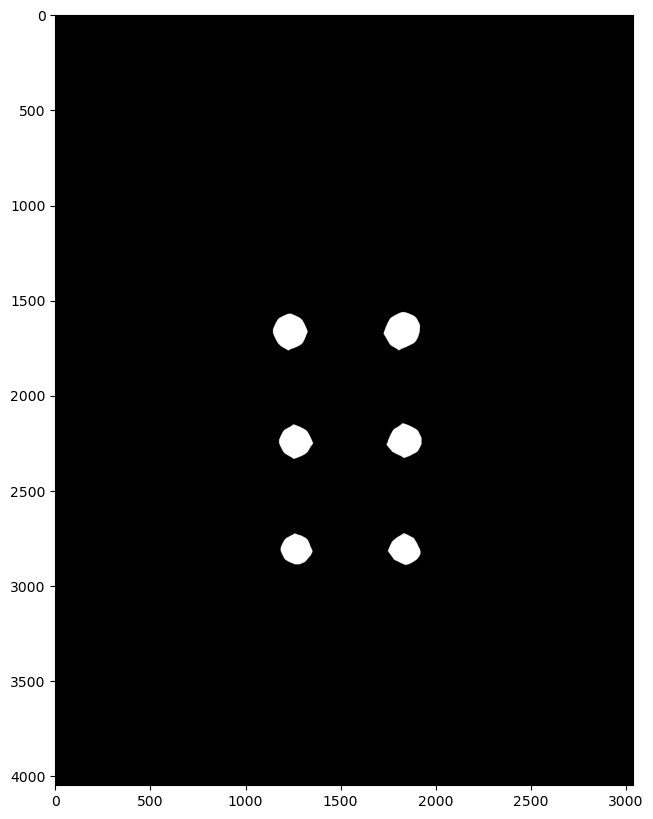

In [40]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
display(sure_fg)

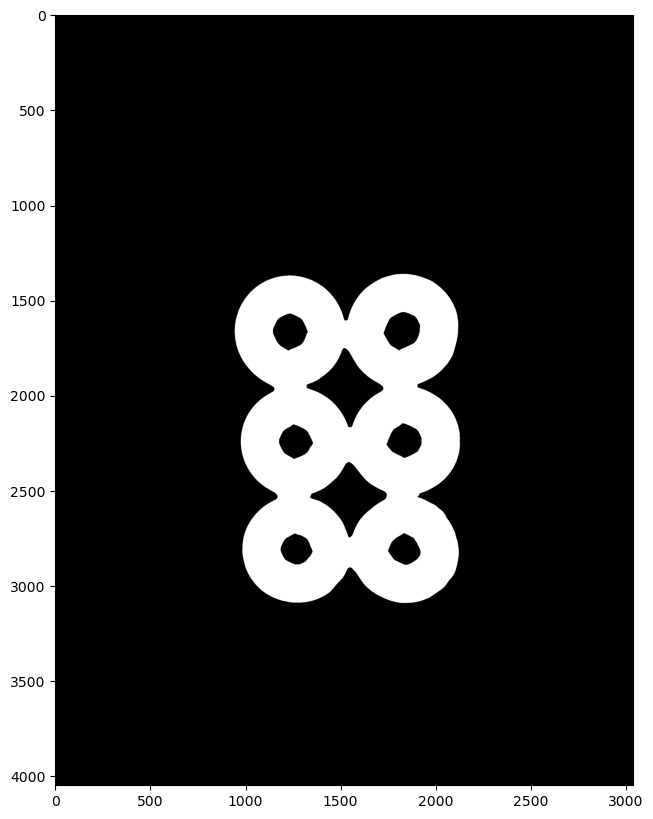

In [41]:
sure_fg = np.uint8(sure_fg)
unkown = cv2.subtract(sure_bg, sure_fg)
display(unkown)